# OmniFlicks NLP Tasks
Team: Ian Boen

## Load Movies Daily Dataset

In [61]:
# Movies Daily Update Dataset
#source: https://www.kaggle.com/code/rohitshirudkar/movie-recommendation-system/data
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from skimage import io

import warnings
warnings.filterwarnings('ignore')

movies_df = pd.read_csv('movies.csv.zip', compression='zip')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744493 entries, 0 to 744492
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    744493 non-null  int64  
 1   title                 744489 non-null  object 
 2   genres                523793 non-null  object 
 3   original_language     744493 non-null  object 
 4   overview              623360 non-null  object 
 5   popularity            744493 non-null  float64
 6   production_companies  345206 non-null  object 
 7   release_date          687712 non-null  object 
 8   budget                744493 non-null  float64
 9   revenue               744493 non-null  float64
 10  runtime               706032 non-null  float64
 11  status                744493 non-null  object 
 12  tagline               109989 non-null  object 
 13  vote_average          744493 non-null  float64
 14  vote_count            744493 non-null  float64
 15  

In [62]:
movies_df.head()

id               title                    genres original_language  \
0  760161  Orphan: First Kill           Horror-Thriller                en   
1  718930        Bullet Train    Action-Comedy-Thriller                en   
2  744276    After Ever Happy             Romance-Drama                en   
3  579974                 RRR              Action-Drama                te   
4  532639           Pinocchio  Fantasy-Adventure-Family                en   

                                            overview  popularity  \
0  After escaping from an Estonian psychiatric fa...    8098.027   
1  Unlucky assassin Ladybug is determined to do h...    7949.491   
2  As a shocking truth about a couple's families ...    4017.342   
3  A fictional history of two legendary revolutio...    3416.323   
4  A wooden puppet embarks on a thrilling adventu...    3239.378   

                                production_companies release_date      budget  \
0  Dark Castle Entertainment-Entertainment One-Ea...   2022-07-27         0.0   
1              Columbia Pictures-87North Productions   2022-07-03  90000000.0   
2  Voltage Pictures-Vertical Entertainment-CalMap...   2022-08-24         0.0   
3     Lyca Productions-DVV Entertainment-Pen Studios   2022-03-24  69000000.0   
4                Walt Disney Pictures-Depth of Field   2022-09-07         0.0   

       revenue  runtime    status  \
0    9572765.0     99.0  Released   
1  231398720.0    126.0  Released   
2          0.0     95.0  Released   
3  160000000.0    182.0  Released   
4          0.0    105.0  Released   

                                            tagline  vote_average  vote_count  \
0  There's always been something wrong with Esther.         6.963       821.0   
1        The end of the line is just the beginning.         7.497      1238.0   
2                They can't stop loving each other.         6.830       215.0   
3                               Rise, roar, revolt.         7.774       370.0   
4                             The timeless classic.         6.753       800.0   

                                             credits  \
0  Isabelle Fuhrman-Julia Stiles-Rossif Sutherlan...   
1  Brad Pitt-Joey King-Aaron Taylor-Johnson-Brian...   
2  Josephine Langford-Hero Fiennes Tiffin-Louise ...   
3  N.T. Rama Rao Jr.-Ram Charan-Alia Bhatt-Ajay D...   
4  Benjamin Evan Ainsworth-Tom Hanks-Joseph Gordo...   

                                            keywords  \
0  psychopath-family secrets-prequel-murder-imper...   
1  japan-assassin-based on novel or book-mission-...   
2          based on novel or book-love-teenage crush   
3  revolution-liberation-slavery-freedom fighter-...   
4  fairy-musical-puppet-live action and animation...   

                        poster_path                     backdrop_path  \
0  /wSqAXL1EHVJ3MOnJzMhUngc8gFs.jpg  /5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg   
1  /tVxDe01Zy3kZqaZRNiXFGDICdZk.jpg  /y2Ca1neKke2mGPMaHzlCNDVZqsK.jpg   
2  /6b7swg6DLqXCO3XUsMnv6RwDMW2.jpg  /rwgmDkIEv8VjAsWx25ottJrFvpO.jpg   
3  /wE0I6efAW4cDDmZQWtwZMOW44EJ.jpg  /i0Y0wP8H6SRgjr6QmuwbtQbS24D.jpg   
4  /g8sclIV4gj1TZqUpnL82hKOTK3B.jpg  /nnUQqlVZeEGuCRx8SaoCU4XVHJN.jpg   

                                     recommendations  
0  606237-818502-744276-721930-1001925-762504-982...  
1  1002564-762504-755566-1002171-682507-884453-55...  
2  20966-676701-419669-804251-766907-619803-67670...  
3  601337-889741-587412-766116-792358-680058-2372...  
4  985939-610150-760741-921360-576925-616037-5799...

In [63]:
movies_df.shape

(744493, 20)

In [64]:
# remove any rows with duplicate title and release date
movies_df.drop_duplicates(subset=['title', 'release_date'], inplace=True)
movies_df.shape

(659949, 20)

In [65]:
# Reframe movies_df for only columns we want
movies_df = movies_df[['title', 'genres', 'overview', 'popularity', 'tagline', 'vote_average', 'vote_count', 'release_date','poster_path']]
movies_df.tagline.fillna('', inplace=True) #Fill any tagline NaN with blank
# Create Description Feature column to combine tagline, overview, and keywords
movies_df['description'] = movies_df['tagline'].map(str) + ' ' + movies_df['overview']
movies_df.dropna(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304643 entries, 0 to 744488
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         304643 non-null  object 
 1   genres        304643 non-null  object 
 2   overview      304643 non-null  object 
 3   popularity    304643 non-null  float64
 4   tagline       304643 non-null  object 
 5   vote_average  304643 non-null  float64
 6   vote_count    304643 non-null  float64
 7   release_date  304643 non-null  object 
 8   poster_path   304643 non-null  object 
 9   description   304643 non-null  object 
dtypes: float64(3), object(7)
memory usage: 25.6+ MB


In [66]:
movies_df.shape

(304643, 10)

In [67]:
movies_df.genres

0                  Horror-Thriller
1           Action-Comedy-Thriller
2                    Romance-Drama
3                     Action-Drama
4         Fantasy-Adventure-Family
                    ...           
744466                       Drama
744476                       Drama
744486                 Documentary
744487                   Animation
744488                      Action
Name: genres, Length: 304643, dtype: object

In [68]:
genre_counts = (movies_df.genres.str.split('-')
                .explode()
                .value_counts()
                .sort_values(ascending=False))
genre_counts.head(10)

Drama          113439
Comedy          66954
Documentary     60739
Romance         29354
Thriller        26643
Action          26234
Horror          25007
Animation       24917
Music           20201
Crime           18481
Name: genres, dtype: int64

In [69]:
# filter all movies that have counts below 100 votes
frequently_voted_movies = movies_df[movies_df.vote_count >= 100].reset_index()
frequently_voted_movies.shape

(15921, 11)

In [70]:
frequently_voted_movies.head(7)

index                   title                    genres  \
0      0      Orphan: First Kill           Horror-Thriller   
1      1            Bullet Train    Action-Comedy-Thriller   
2      2        After Ever Happy             Romance-Drama   
3      3                     RRR              Action-Drama   
4      4               Pinocchio  Fantasy-Adventure-Family   
5      5                   Beast    Adventure-Drama-Horror   
6      6  Thor: Love and Thunder     Fantasy-Action-Comedy   

                                            overview  popularity  \
0  After escaping from an Estonian psychiatric fa...    8098.027   
1  Unlucky assassin Ladybug is determined to do h...    7949.491   
2  As a shocking truth about a couple's families ...    4017.342   
3  A fictional history of two legendary revolutio...    3416.323   
4  A wooden puppet embarks on a thrilling adventu...    3239.378   
5  A recently widowed man and his two teenage dau...    2806.464   
6  After his retirement is interrupted by Gorr th...    2340.753   

                                            tagline  vote_average  vote_count  \
0  There's always been something wrong with Esther.         6.963       821.0   
1        The end of the line is just the beginning.         7.497      1238.0   
2                They can't stop loving each other.         6.830       215.0   
3                               Rise, roar, revolt.         7.774       370.0   
4                             The timeless classic.         6.753       800.0   
5                                 Fight for family.         7.093       529.0   
6                          The one is not the only.         6.762      3959.0   

  release_date                       poster_path  \
0   2022-07-27  /wSqAXL1EHVJ3MOnJzMhUngc8gFs.jpg   
1   2022-07-03  /tVxDe01Zy3kZqaZRNiXFGDICdZk.jpg   
2   2022-08-24  /6b7swg6DLqXCO3XUsMnv6RwDMW2.jpg   
3   2022-03-24  /wE0I6efAW4cDDmZQWtwZMOW44EJ.jpg   
4   2022-09-07  /g8sclIV4gj1TZqUpnL82hKOTK3B.jpg   
5   2022-08-11  /iRV0IB5xQeOymuGGUBarTecQVAl.jpg   
6   2022-07-06  /pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg   

                                         description  
0  There's always been something wrong with Esthe...  
1  The end of the line is just the beginning. Unl...  
2  They can't stop loving each other. As a shocki...  
3  Rise, roar, revolt. A fictional history of two...  
4  The timeless classic. A wooden puppet embarks ...  
5  Fight for family. A recently widowed man and h...  
6  The one is not the only. After his retirement ...

In [71]:
# Sort frequently voted movies descending by popularity and vote_average and set to highly_rated_movies
highly_rated_movies = frequently_voted_movies.sort_values(by=['popularity','vote_average'], ascending=False)
highly_rated_movies

index               title                    genres  \
0           0  Orphan: First Kill           Horror-Thriller   
1           1        Bullet Train    Action-Comedy-Thriller   
2           2    After Ever Happy             Romance-Drama   
3           3                 RRR              Action-Drama   
4           4           Pinocchio  Fantasy-Adventure-Family   
...       ...                 ...                       ...   
15916  407929              Tracks           Adventure-Drama   
15920  611917          Stalingrad          War-Action-Drama   
15919  438401              G.B.F.              Comedy-Drama   
15918  427383     Serial Teachers                    Comedy   
15917  421516      Mohamed Dubois                    Comedy   

                                                overview  popularity  \
0      After escaping from an Estonian psychiatric fa...    8098.027   
1      Unlucky assassin Ladybug is determined to do h...    7949.491   
2      As a shocking truth about a couple's families ...    4017.342   
3      A fictional history of two legendary revolutio...    3416.323   
4      A wooden puppet embarks on a thrilling adventu...    3239.378   
...                                                  ...         ...   
15916  Accompanied only by her faithful dog and four ...       0.600   
15920  A band of determined Russian soldiers fight to...       0.600   
15919  The bitter fight for supremacy between the thr...       0.600   
15918  With only 12 percent of its pupils obtaining t...       0.600   
15917  Arnaud Dubois may be the heir to a bank but he...       0.600   

                                                 tagline  vote_average  \
0       There's always been something wrong with Esther.         6.963   
1             The end of the line is just the beginning.         7.497   
2                     They can't stop loving each other.         6.830   
3                                    Rise, roar, revolt.         7.774   
4                                  The timeless classic.         6.753   
...                                                  ...           ...   
15916                           Leave everything behind.         6.914   
15920  The epic battle that turned the tide of World ...         6.500   
15919                    Being out has never been so in.         6.000   
15918                                                            5.475   
15917                                                            4.800   

       vote_count release_date                       poster_path  \
0           821.0   2022-07-27  /wSqAXL1EHVJ3MOnJzMhUngc8gFs.jpg   
1          1238.0   2022-07-03  /tVxDe01Zy3kZqaZRNiXFGDICdZk.jpg   
2           215.0   2022-08-24  /6b7swg6DLqXCO3XUsMnv6RwDMW2.jpg   
3           370.0   2022-03-24  /wE0I6efAW4cDDmZQWtwZMOW44EJ.jpg   
4           800.0   2022-09-07  /g8sclIV4gj1TZqUpnL82hKOTK3B.jpg   
...           ...          ...                               ...   
15916       430.0   2013-12-19  /5Pa9skURzak6qGF6qfpLdPTmGPK.jpg   
15920       280.0   2013-10-09  /pk2d5ahR9g4R3YDlhNA5m1vHhFv.jpg   
15919       366.0   2013-04-19  /f4fR1WMgSv7K93ZPoJlPyvaApdE.jpg   
15918      1099.0   2013-04-17  /59Bi4wtdoxXV9eaPat7em2ahISI.jpg   
15917       107.0   2013-05-01  /8yDj1OSr5fAdDBH6tqx3j2yK8x8.jpg   

                                             description  
0      There's always been something wrong with Esthe...  
1      The end of the line is just the beginning. Unl...  
2      They can't stop loving each other. As a shocki...  
3      Rise, roar, revolt. A fictional history of two...  
4      The timeless classic. A wooden puppet embarks ...  
...                                                  ...  
15916  Leave everything behind. Accompanied only by h...  
15920  The epic battle that turned the tide of World ...  
15919  Being out has never been so in. The bitter fig...  
15918   With only 12 percent of its pupils obtaining ...  
15917   Arnaud Dubois may be th

# Build a Movie Recommender System

## Pipeline

### Text Pre-processing

Basic text pre-processing on the movie descriptions 

In [72]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    #make lower case and remove special characters/whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    #document tokenization
    tokens = nltk.word_tokenize(doc)
    #filter out stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # recreate document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(highly_rated_movies['description']))
len(norm_corpus)

15921

# Extract TF-IDF Features

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.7)
tfidf_matrix = tf.fit_transform(norm_corpus)

#Create TFIDF DataFrame from the array
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names())


# Label Index as Movie Titles
# tfidf_df.index = highly_rated_movies['title']
print(tfidf_df.head())

    00  000  007  007 back   10  10 brain  10 days  10 million  10 minutes  \
0  0.0  0.0  0.0       0.0  0.0       0.0      0.0         0.0         0.0   
1  0.0  0.0  0.0       0.0  0.0       0.0      0.0         0.0         0.0   
2  0.0  0.0  0.0       0.0  0.0       0.0      0.0         0.0         0.0   
3  0.0  0.0  0.0       0.0  0.0       0.0      0.0         0.0         0.0   
4  0.0  0.0  0.0       0.0  0.0       0.0      0.0         0.0         0.0   

   10 year  ...  zoo animals  zooey  zoologists  zoom  zoos  zorba  zoro  \
0      0.0  ...          0.0    0.0         0.0   0.0   0.0    0.0   0.0   
1      0.0  ...          0.0    0.0         0.0   0.0   0.0    0.0   0.0   
2      0.0  ...          0.0    0.0         0.0   0.0   0.0    0.0   0.0   
3      0.0  ...          0.0    0.0         0.0   0.0   0.0    0.0   0.0   
4      0.0  ...          0.0    0.0         0.0   0.0   0.0    0.0   0.0   

   zoro sanji  zorro   zs  
0         0.0    0.0  0.0  
1         0.0    0

# Compute Pairwise Document Similarity

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

#Create array of cosine similarity values
doc_sim = cosine_similarity(tfidf_df)

# Wrap array in DataFrame and set labels as tfidf index
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

0      1         2         3        4         5         6         7      \
0    1.0    0.0  0.000000  0.000000  0.00000  0.026084  0.000000  0.000000   
1    0.0    1.0  0.000000  0.000000  0.00000  0.011967  0.003869  0.021560   
2    0.0    0.0  1.000000  0.008449  0.01719  0.006629  0.011029  0.000000   
3    0.0    0.0  0.008449  1.000000  0.00000  0.024532  0.000000  0.035739   
4    0.0    0.0  0.017190  0.000000  1.00000  0.000000  0.014542  0.000000   

   8        9      ...     15911     15912  15913  15914  15915  15916  \
0    0.0  0.10075  ...  0.020339  0.000000    0.0    0.0    0.0    0.0   
1    0.0  0.00000  ...  0.018072  0.000000    0.0    0.0    0.0    0.0   
2    0.0  0.00000  ...  0.000000  0.008415    0.0    0.0    0.0    0.0   
3    0.0  0.00000  ...  0.000000  0.010310    0.0    0.0    0.0    0.0   
4    0.0  0.00000  ...  0.000000  0.000000    0.0    0.0    0.0    0.0   

      15917  15918  15919     15920  
0  0.000000    0.0    0.0  0.028123  
1  0.040330    0.0    0.0  0.013197  
2  0.000000    0.0    0.0  0.000000  
3  0.000000    0.0    0.0  0.000000  
4  0.013461    0.0    0.0  0.000000  

[5 rows x 15921 columns]

# Find Top Similar Movies for a Sample Movie

Find similar recommendations to Interstellar

###### Get index of movie title

In [75]:
index = highly_rated_movies.index[highly_rated_movies['title'] == 'Interstellar'][0]
index

161

###### Get movie similarity scores and sort top 6 most similar to searched title

In [76]:
similarity_scores = pd.Series(doc_sim_df[index]).sort_values(ascending=False) #get index of similar and sort descending
top_6_movies = list(similarity_scores.iloc[1:7].index)
top_6_movies

[9806, 4787, 2328, 7812, 942, 781]

###### Return movie titles

In [77]:
result = highly_rated_movies.iloc[top_6_movies]
result.title

9806                  The Beyond
4787             Return to Space
2328                     Gattaca
7812               Space Cowboys
942          Final Destination 2
781     Star Wars: The Last Jedi
Name: title, dtype: object

### Build a movie recommender function to recommend top 5 similar movies for any movie

Movie title, movie title list and document similarity matrix dataframe will be given as inputs to the function

In [78]:
def movie_recommender(movie_title):
    
    
    # find movie id
    index = highly_rated_movies.index[highly_rated_movies['title'] == movie_title][0]
    
    # get movie poster
    try:
        poster = io.imread(f'https://image.tmdb.org/t/p/w500/{highly_rated_movies.iloc[index]["poster_path"]}')
        plt.imshow(poster)
        plt.axis('off')
        plt.title(movie_title)
        plt.show()
    except: pass
    
    
    
    # get movie similarities and sort descending
    similarity_scores = list(enumerate(
        cosine_similarity(tfidf_matrix,
                          tfidf_matrix[index])))
    
    # Sort descending based on scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # get top 6 similar movies
    similarity_scores = similarity_scores[1:7]
    
    # Get movie indices
    indices = [i[0] for i in similarity_scores]
    
    # Return top 6 movies
    result = highly_rated_movies.iloc[indices]
    
    # get recommendations movie posters
    fig, ax = plt.subplots(2, 3, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title)
            poster = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(poster)
        except: pass
    fig.tight_layout()
    fig.show()

    return "\033[1m" + 'Recommendations' + "\033[0m" + '\n'

Please enter movie title: Thor


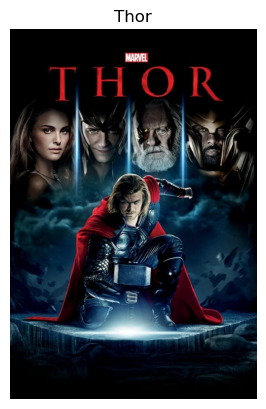

Recommendations



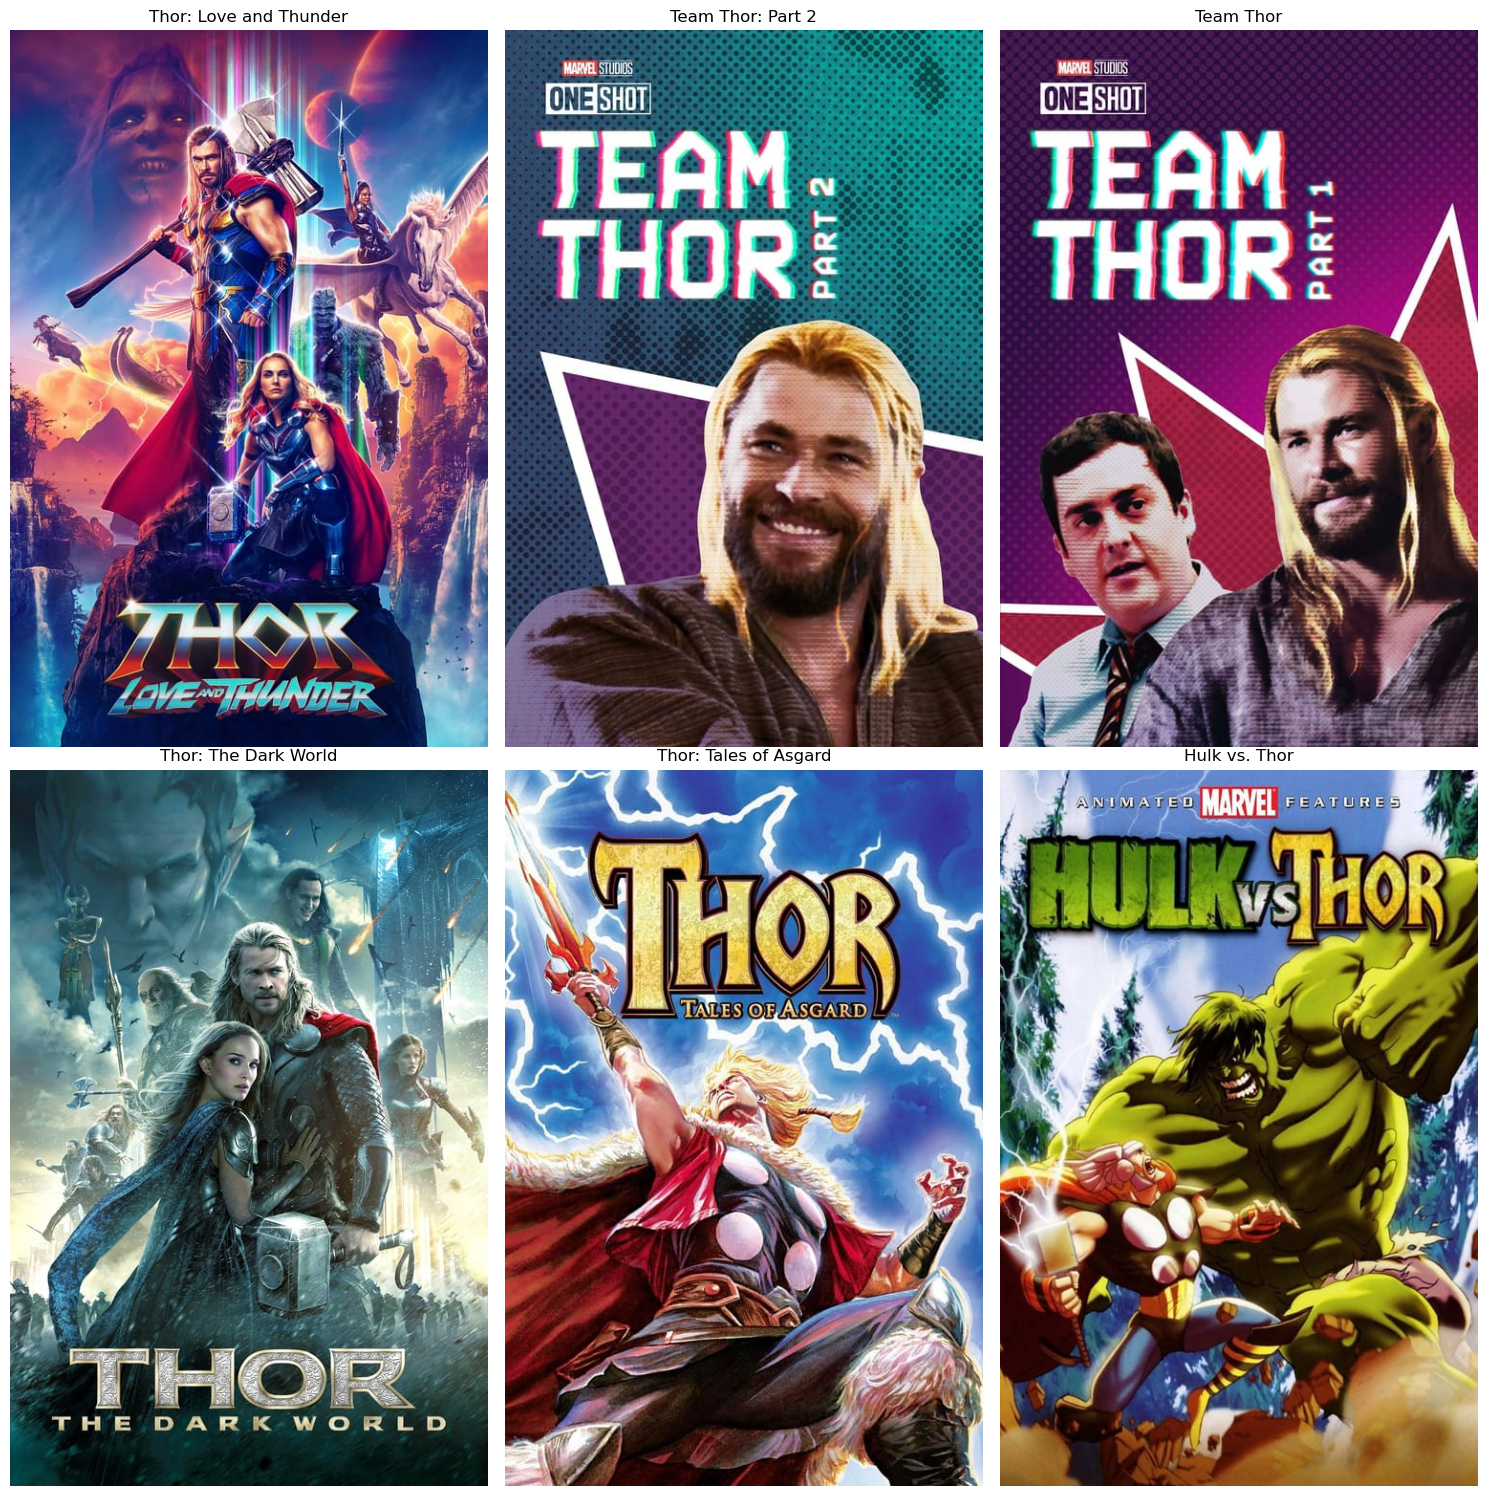

In [79]:
# Movie Title Prompt
    
movie_title = input('Please enter movie title: ')

print(movie_recommender(movie_title))

In [80]:
# save movies list to pickle for retrieve later
pickle.dump(highly_rated_movies, open('movie_list.pkl', 'wb'))
pickle.dump(tfidf_matrix, open('tfidf_matrix.pkl', 'wb'))

# Deploy Movie Recommender

In [81]:
import os
os.getcwd()

'/Users/ian/NLP Assignments/OmniFlicks'

## Writing to OmniFlicks app inside Streamlit

In [132]:
%%writefile Omniflicks.py

import streamlit as st
import pickle
from streamlit_option_menu import option_menu
import streamlit.components.v1 as components
import numpy as np
import pandas as pd
import base64
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from streamlit_extras.app_logo import add_logo

#Set initial page configurations
st.set_page_config(
    layout="wide",
    initial_sidebar_state="expanded"
)

#Condense with padding
padding = 0
st.markdown(f""" <style>
    .reportview-container .main .block-container{{
        padding-top: {padding}rem;
        padding-right: {padding}rem;
        padding-left: {padding}rem;
        padding-bottom: {padding}rem;
    }} </style> """, unsafe_allow_html=True)

# Add background image    
def add_bg_from_local(image_file):
    with open(image_file, 'rb') as image_file:
        encoded_string = base64.b64encode(image_file.read())
    st.markdown(
    f"""
    <style>
    .stApp{{
        background-image: url(data:image/{'jpeg'};base64,{encoded_string.decode()});
        background-size: cover;
    }}
    <style/>
    """,
    unsafe_allow_html=True
    )
add_bg_from_local('movie_background.jpeg')


# Update sidebar
updated_sidebar = '''
    <style>
    #stSidebarNav {
    font-family: "Showtime"
    }
    </style>
    '''
    
st.markdown('''
    <style>
        [data-testid="stSidebarNav"] {
        font-family: 'Showtime'
        }
    </style>
    ''', unsafe_allow_html=True)

    

# Add columns with logo and Omniflicks title

col1, mid, col2 = st.columns([2,1,8])
with col1:
    st.image("Omni Reel-80.jpg", width=100)

with col2:
    st.markdown('''
    <style>.font{
        font-size:60px; font-family: 'Showtime'
    }
    </style> ''', unsafe_allow_html=True)
    st.markdown('<h1 class="font">OmniFlicks</h1>', 
                unsafe_allow_html=True)

st.header('Top 6 movie recommendations based on popular and highly-rated titles')



@st.cache
def movie_recommender(movie_title):
    
    # find movie id
    index = highly_rated_movies.index[highly_rated_movies['title'] == movie_title][0]
    
    # get selected movie poster

    poster = f'https://image.tmdb.org/t/p/w500/{highly_rated_movies.loc[index,"poster_path"]}'
    
    
    
   # get movie similarities and sort descending
    similarity_scores = list(enumerate(
        cosine_similarity(tfidf_matrix,
                          tfidf_matrix[index])))
    
    # Sort descending based on scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # get top 6 similar movies
    similarity_scores = similarity_scores[1:7]
    
    # Get movie indices
    indices = [i[0] for i in similarity_scores]
    
    # Return top 6 movies
    result = highly_rated_movies.iloc[indices]
    
    recommended_movie_titles = []
    recommended_movie_posters = []
    recommended_movie_descriptions = []
    
    # get recommendations movie titles, posters, descriptions
    
    for i, j in enumerate(result.poster_path):
        recommended_movie_titles.append(result.iloc[i].title)
        recommended_movie_posters.append(f'https://image.tmdb.org/t/p/w500/{j}')
        recommended_movie_descriptions.append(result.iloc[i].description)
    
    return poster, recommended_movie_titles, recommended_movie_posters, recommended_movie_descriptions


highly_rated_movies = pickle.load(open('movie_list.pkl', 'rb'))
tfidf_matrix = pickle.load(open('tfidf_matrix.pkl', 'rb'))
    

movies_list = highly_rated_movies['title'].values

selected_movie = st.selectbox('Type and Choose Movie', movies_list)


if st.button('Recommend'):
    
    poster,recommended_movie_titles,recommended_movie_posters,recommended_movie_descriptions = movie_recommender(selected_movie)
    st.markdown('''
    <style>.output_font{
        font-size:30px; font-family: 'Showtime'
    }
    </style> ''', unsafe_allow_html=True)
    st.markdown('<p class="output_font">Selected Movie</p>', 
                unsafe_allow_html=True)
    
    st.image(poster,width=160)
    
    st.markdown('<p class="output_font">Top 6 Recommendations</p>', 
                unsafe_allow_html=True)
    
    col1, col2, col3 = st.columns(3)
    with col1:
        st.image(recommended_movie_posters[0])
        st.markdown(recommended_movie_titles[0])
        with st.expander("Synopsis"):
            st.write(recommended_movie_descriptions[0])

        st.image(recommended_movie_posters[3])
        st.markdown(recommended_movie_titles[3])
        with st.expander("Synopsis"):
            st.write(recommended_movie_descriptions[3])

            
    with col2:
        st.image(recommended_movie_posters[1])
        st.markdown(recommended_movie_titles[1])
        with st.expander("Synopsis"):
            st.write(recommended_movie_descriptions[1])

        st.image(recommended_movie_posters[4])
        st.markdown(recommended_movie_titles[4])
        with st.expander("Synopsis"):
            st.write(recommended_movie_descriptions[4])

            
    with col3:
        st.image(recommended_movie_posters[2])
        st.markdown(recommended_movie_titles[2])
        with st.expander("Synopsis"):
            st.write(recommended_movie_descriptions[2])

        st.image(recommended_movie_posters[5])
        st.markdown(recommended_movie_titles[5])
        with st.expander("Synopsis"):
            st.write(recommended_movie_descriptions[5])


Overwriting Omniflicks.py


# Movie Titles and Genres

### Crosstabulation for Movie Title and Genre

In [83]:
# pop_movies['movie_genres'] = pop_movies['genres'].str.split('-')
# movie_genres = pop_movies['movie_genres']
# movie_genres

In [84]:
# movie_genre_df.head()

In [85]:
# movie_genre_df = pop_movies[['title', 'movie_genres']]
# movie_genre_df = pd.crosstab(pop_movies['title'], pop_movies['movie_genres'])
# movie_genre_df

### Finding distance between all items using Jaccard

In [86]:
from scipy.spatial.distance import pdist, squareform

jaccard_distances = pdist(movie_genre_df.values, metric='jaccard')
print(jaccard_distances)

NameError: name 'movie_genre_df' is not defined

In [ ]:
square_jaccard_distances = squareform(jaccard_distances)
print(square_jaccard_distances)

In [ ]:
# Since Jaccard distance measures how different rows are from each other, we want to subtract from 1 to find similarity to each other
jaccard_similarity_array = 1 - square_jaccard_distances
print(jaccard_similarity_array)

### Distance Table for Genre

In [ ]:
distance_df = pd.DataFrame(jaccard_similarity_array,
                          index=movie_genre_df.index,
                          columns=movie_genre_df.index)

distance_df.head()

In [ ]:
#Sort Values from Highest to Lowest
jaccard_similarity_series = distance_df.loc['Star Wars']
ordered_similarities = jaccard_similarity_series.sort_values(ascending=False)
ordered_similarities

In [ ]:
# Sorting by popular movies and genre
pop_genres = highly_rated_movies.sort_values(by=['popularity', 'genres'], ascending=False)
pop_genres.head(10)

In [ ]:
def genre_recommender(movie_genre, movies=movies_list, doc_sims=doc_sim_df):
    # find movie id
    movie_idx = np.where(movies_list == movie_genre)[0][0]
    # get movie poster
    try:
        poster = io.imread(f'https://image.tmdb.org/t/p/w500/{highly_rated_movies.iloc[movie_idx]["poster_path"]}')
        plt.imshow(poster)
        plt.axis('off')
        plt.title(movie_title)
        plt.show()
    except: pass
    
    
    
    # get movie similarities
    movie_similarities = doc_sims.iloc[movie_idx].values
    
    # get top 6 similar movie IDs
    similar_movie_idxs = np.argsort(-movie_similarities)[1:7]
    
    # get top 6 movies
    similar_movies = highly_rated_movies.iloc[similar_movie_idxs]
    
    # get recommendations movie posters
    fig, ax = plt.subplots(2, 3, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(similar_movies.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(similar_movies.iloc[i].title)
            poster = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(poster)
        except: pass
    fig.tight_layout()
    fig.show()

    return "\033[1m" + 'Recommendations' + "\033[0m" + '\n'

In [ ]:
# Movie Genre Prompt
movie_genre = input('Please enter movie title: ')
print(genre_recommender(movie_genre))

Much of my limited time to work on this outside of work is taken up by family requirements, but knowing what I know now I would have tried to devote at least a bit more time during the evenings to dig into API functionality and user profile recommendations.

Looking back, my proposal was a bit ambitious for functionality in such a short timeframe given the fact I have never dealt with APIs and this being the first time I have built an application designed to be used by an end user. Given more time and knowledge, I still think the proposed application functionalities could be built, but I was at least able to build the core recommendation engine to provide the basis for content-based recommendations.